# Import the required packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.colors as colors
import matplotlib.cm as mplcm
from cycler import cycler

%matplotlib inline
pi = np.pi

# Set parameters for plots
fig_font = {'family': 'serif',
        'fontname':'Arial',
        'color':  'black',
        'weight': 'normal',
        'size': 20
        }
fig_size = (8,6)
fig_dpi = 400

# Import true data and predicted data

In [2]:
def NRMSE(yhat, y):
    num = np.sqrt(np.mean((yhat.flatten() - y.flatten())**2))
    den = max(y) - min(y)
    return num / den

df = pd.read_excel('CNN_results.xlsx','Sheet1')
cond_norm_true = df['Normalized conductance'].values
cond_norm_pred = df['Prediction_12'].values
x_true = np.arange(len(cond_norm_true))
x_pred = np.arange(len(cond_norm_pred))

# Visualize the predicted data
print("The normalized RMSE is: ")
print(NRMSE(cond_norm_pred, cond_norm_true))


The normalized RMSE is: 
0.19562438747125108


# Visualize the results

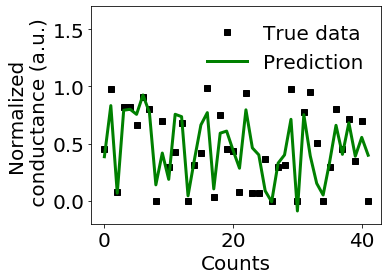

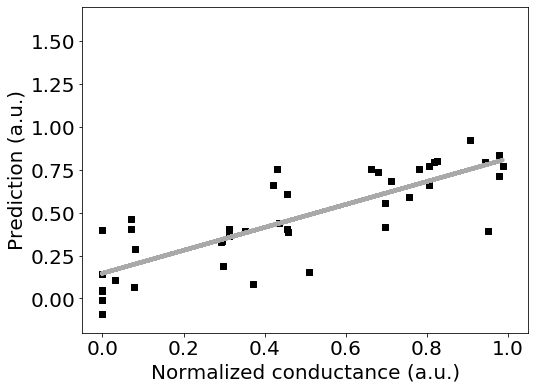

In [3]:
legendStr = ['True data','Prediction']

fig,ax = plt.subplots()
fig.set_size_inches((5.2,4))
ax.plot(x_true,cond_norm_true,'ks',x_pred,cond_norm_pred,'green',linewidth=3)
plt.tick_params(axis='both', which='major', labelsize=fig_font['size'])
ax.set_xlabel('Counts',fontsize=fig_font['size'])
ax.set_ylabel('Normalized\n conductance (a.u.)', fontsize=fig_font['size'])
plt.ylim([-0.2,1.7])
plt.legend(legendStr,fontsize=fig_font['size'],frameon=False)
plt.show()


m, b = np.polyfit(cond_norm_true, cond_norm_pred, 1)

fig,ax = plt.subplots()
fig.set_size_inches(fig_size)
plt.scatter(cond_norm_true,cond_norm_pred,color='black',marker='s')
plt.plot(cond_norm_true, m*cond_norm_true+b, 'darkgrey',linewidth=4)
plt.tick_params(axis='both', which='major', labelsize=fig_font['size'])
plt.xlabel('Normalized conductance (a.u.)',fontsize=fig_font['size'])
plt.ylabel('Prediction (a.u.)',fontsize=fig_font['size'])
plt.xlim([-0.05,1.05])
plt.ylim([-0.2,1.7])
plt.show()